In [98]:
import numpy as np
from scipy.linalg import lstsq, norm, eig, pinv
from numpy.random import rand, randn, permutation
import matplotlib.pyplot as plt
import scipy.io as io

In [99]:
def subg(x,y,w,lam,N):     
# % Inputs:       x is a feature vector of length D            
# %               y is the label of x and takes value -1 or +1
# %               lam is the regularization paramter
# %               N is the total number of data points in the training set
# %               
# % Outputs:      g is a subgradient for the optimal soft-margin hyperplane cost function
    if y*x.T@w < 1:
        g = (1/N)*(-y*x + lam*w)
    else:
        g = (1/N)*(lam*w)
    return g

In [100]:
def smgd(X,y,lam,numIter):       
# """Solves hinge loss using gradient descent"""
# % Inputs:       X is a (D x N) matrix whose columns are examples/features            
# %               y is a vector of length N whose values are the labels -1 and +1
# %               lam is the regularization paramter
# %               numIter is the number of iterations to perform
# %               
# % Outputs:      wgd is a vector of length D that defines the separating hyperplane
# %               cost is a vector of length numIter of the cost at each iteration
    D, N = X.shape 
    wgd  = np.zeros(D)
    cost = np.zeros(numIter)

    for jj in range(numIter):
        g = np.zeros(D)
        mu = 100/(jj+1) # learning rate
        for ii in range(N):
            g = g + subg(X[:,ii],y[ii],wgd,lam,N)
            cost[jj] = cost[jj] + (1/N)*(max(0,1-y[ii]*(X[:,ii].T@wgd)) +(lam/2)*norm(wgd,2)**2)
        wgd = wgd - mu*g
    return wgd, cost

In [101]:
def smsgd(X,y,lam,numIter):  
# """Solves hinge loss using STOCHASTIC gradient descent"""
    D, N = X.shape 
    wsgd = np.zeros(D)
    cost = np.zeros(numIter)

    for jj in range(numIter):
        ind = permutation(N)
        g = np.zeros(D)
        mu = 100/(jj+1) # learning rate
        for ii in range(N):
            rInd = ind[ii]
            g = subg(X[:,rInd],y[rInd],wsgd,lam,N)
            cost[jj] = cost[jj] + (1/N)*(max(0,1-y[rInd]*(X[:,rInd].T@wsgd))+(lam/2)*norm(wsgd,2)**2)
            wsgd = wsgd - mu*g
    return wsgd, cost

In [ ]:
data = io.loadmat('nuclear')
y = data['y'][0,:]
x = data['x']

# Split training and test data
Ntrain = 10000
Ntest  = 10000
Xtrain = x[:,:Ntrain]
ytrain = y[:Ntrain]
Xtest  = x[:,Ntrain:]
ytest  = y[Ntrain:]

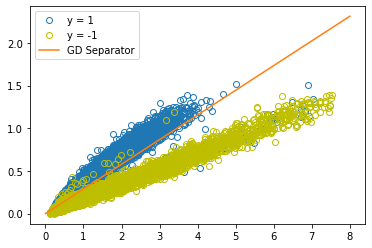

In [106]:
# Train using standard gradient descent
numIter = 20
lam = 0.001
wgd, gdCost = smgd(Xtrain,ytrain,lam,numIter)

# plot full dataset
plt.plot(x[0,y==1], x[1,y==1],'o',mfc='none',label='y = 1')
plt.plot(x[0,y==-1],x[1,y==-1],'yo',mfc='none',label='y = -1')

# Plot GD separator
xx  = np.linspace(0,8,100)
yygd = -wgd[0]*xx/wgd[1]
plt.plot(xx,yygd,label='GD Separator')
plt.legend();

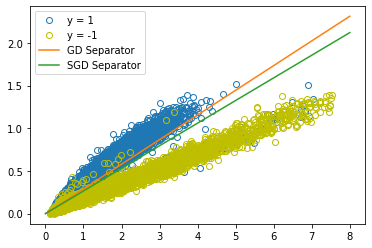

In [107]:
# Train using stochastic gradient descent
# np.random.seed(2)
wsgd, sgdCost = smsgd(Xtrain,ytrain,lam,numIter)

# plot full dataset
plt.plot(x[0,y==1], x[1,y==1],'o',mfc='none',label='y = 1')
plt.plot(x[0,y==-1],x[1,y==-1],'yo',mfc='none',label='y = -1')
# Plot GD separator
plt.plot(xx,yygd,label='GD Separator')

# Plot SGD separator
yysgd = -wsgd[0]*xx/wsgd[1]
plt.plot(xx,yysgd,label='SGD Separator')
plt.legend();

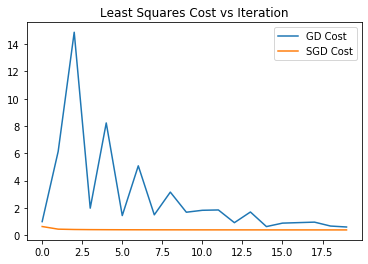

In [109]:
# plot cost vs iteration
plt.plot(gdCost,label='GD Cost')
plt.plot(sgdCost,label='SGD Cost')
plt.legend()
plt.title('Least Squares Cost vs Iteration');